# ROC and AUC

### Introduction

Now let's take another look at a our logistic regression model for our breast cancer dataset.  We'll make the model a little simpler by only plotting the data in one dimension.

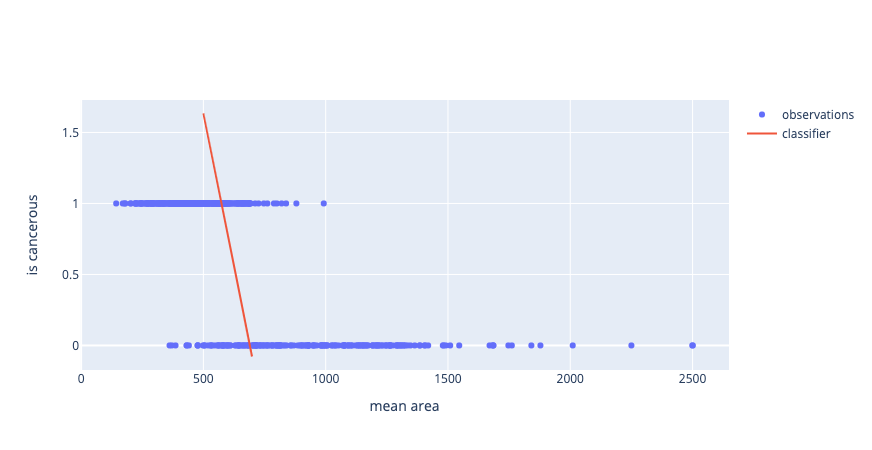

In [28]:
with open('./one_dim_fig.json') as file:
    one_dim_fig_json = json.load(file)
    
one_dim_fig = json.loads(one_dim_fig_json)
fig = go.Figure(one_dim_fig)
fig

Now if we break down how a loss occurs with our classifier, we can say there are two factors contributing to our loss.

* Threshold

One of these factors is the threshold of our classifier.  We can think of this as the placement of our decision boundary function.  For example if we slid our orange line all of the way to the left, we would classify everything as benign.  Choosing different thresholds lead to different accuracy scores (the percentage of observations that we classify correctly).

* Separability
The other component is the separability of our observations.  This is essentially the order of our datapoints.  If we have all of the negative events to the left of all of the positive datapoints, then we could imagine choosing a threshold that separates all of our negative observations from our positive observations.  However, if our observations are not separable, then we cannot avoid error, regardless of our threshold.

### Our changing thresholds

If we think about it, it's not too difficult to change our threshold for classifying something positive or negative.  Remember that our threshold is just the sign of our score.  If we wish classify more events as positive, we can simply add a constant to our decision function.

In [29]:
# log_model.decision_function(X)[:7]

# [-2.67485155, -5.46965257, -4.41192787,  2.61291196, -5.22027032,
#         1.83036768, -3.01022767]

The other thing to note is that even if fitting our function already fits our data in a way log loss, there may be reasons for wanting to modify this threshold.  For example, if we are classifying emails as spam or not, we could imagine that it's more costly to misclassify as spam and thus we miss the email, and less costly to misclassify an email as not spam, and causing us to click delete.  So we could want to subtract from our score, so that we can classify more emails as authentic rather than spam. 

So we can slide our thresholds up and down depending on how much we weight false negatives over false negatives.

### Our changing separabilities

While the threshold that we choose can change on broader objectives and can be modified, the way that we value our separability stays fixed: we always want our classifier to separate our data as much as possible.  If our data is not separable, then we will suffer that same loss regardless of the threshold we choose.

The separability from our model is dependent on our model's quality.  For example, in our simple model above we see that mean area does a fairly good job of separating our positive data from our negative.  The cancerous observations tend to be more to the left than the benign observations.  And if we add mean concavity we gain further separability.  

### Evaluating Separability

To evaluate the separability of the data, we can start by considering the ROC (Receiver Operating Characteristic) curve.

> **The ROC curve** is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.

Let's see this by way of example.  We can start with an example where our data is perfectly separable by mean area.

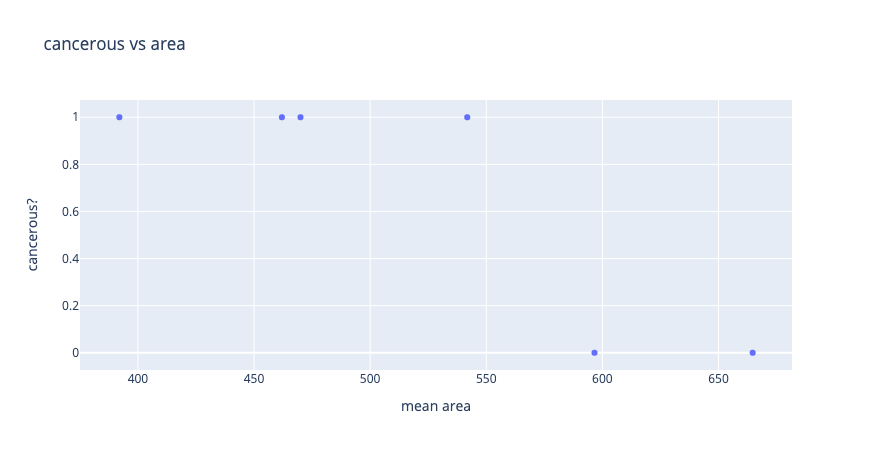

In [88]:
df_separated = pd.read_csv('./separated_classes.csv', index_col = 0)
scatter = go.Scatter(x = df['area'], y = df['target'], mode = 'markers')
go.Figure(scatter, layout = {'title': 'cancerous vs area', 'xaxis': {'title': 'mean area'}, 'yaxis': {'title': 'cancerous?'}})

So notice that all of the cancerous cells are to the left and the benign cells are to the right.  

One way to turn this into a metric is to go one by one through each observation, and indicate how many cancerous cells have been counted and how many benign cells have been counted.  This is called the area under the curve.

> **Area under the curve** measures the probability that a classifier will rank a randomly chosen positive instance higher than a randomly chosen negative one.

  These are the points we'll get.

In [93]:
# benign observations, cancerous observations
roc = [
    [0, 0],
    [0, 1], 
    [0, 2],
    [0, 3],
    [0, 4],
    [1, 4],
    [2, 4],
         ]

Let's plot it.

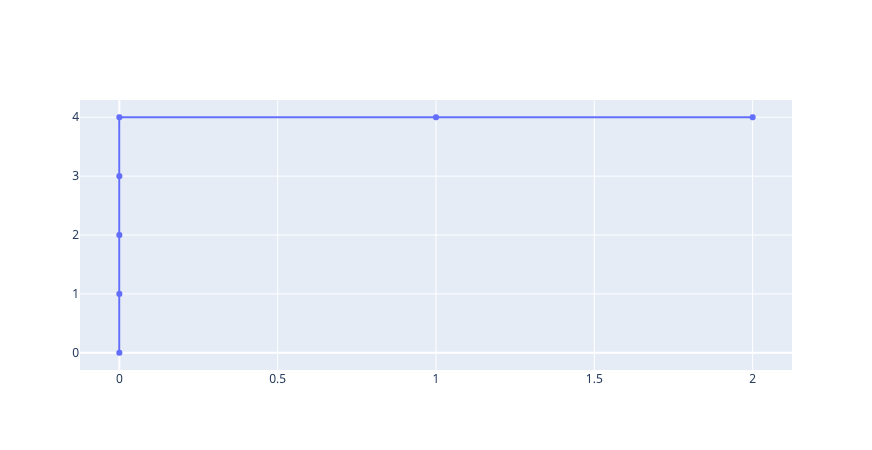

In [94]:
x_vals = [pair[0] for pair in roc]
y_vals = [pair[1] for pair in roc]
scatter = go.Scatter(x = x_vals, y = y_vals)
go.Figure(scatter)

This area under the curve is 100 percent.  First we capture all of the area in the y direction -- 4, and then capture all of the area in the x direction, 2.  The total area is 8, and the area we capture is also 8. 

Now consider what happens if in the cases where we do not perfectly separate our data.

In [2]:
mixed_df = pd.read_csv('./vals.csv')

scatter = go.Scatter(x = mixed_df['area'], y = mixed_df['target'], mode = 'markers')
mixed_fig = go.Figure(scatter, layout = {'title': 'cancerous vs area', 'xaxis': {'title': 'mean area'}, 'yaxis': {'title': 'cancerous?'}})

mixed_fig

NameError: name 'go' is not defined

This time, if we go from left to right, calculating the number of cancerous and benign observations, we get the following:

In [97]:
# benign observations, cancerous observations
roc_2 = [
    [0, 0],
    [0, 1], 
    [0, 2],
    [1, 2],
    [1, 3],
    [2, 3],
    [3, 3]
         ]

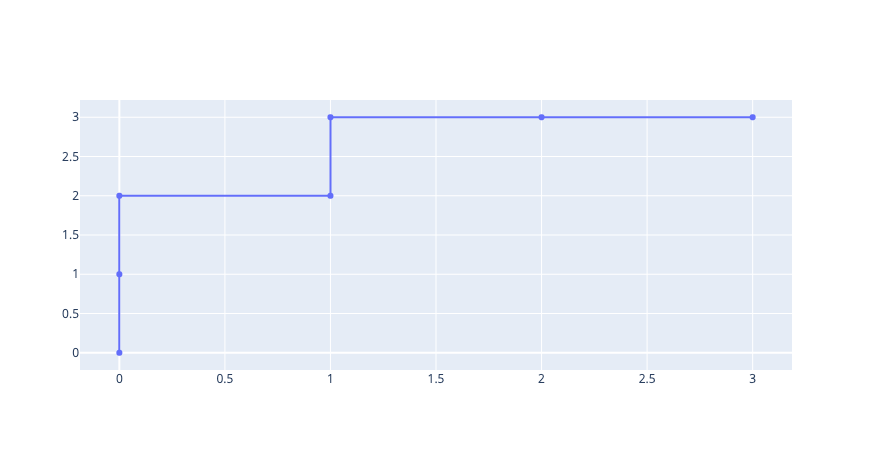

In [98]:
x_vals = [pair[0] for pair in roc_2]
y_vals = [pair[1] for pair in roc_2]
scatter = go.Scatter(x = x_vals, y = y_vals)
go.Figure(scatter)

So here, we can see that we do not capture all of our area.  Out of a potential 3x3=9 total area, we are capturing $\frac{8}{9}$ of it.

### Notes

* ROC space - each prediction or result is an example of an ROC space
* TPR sensitivity - no false negatives (no missed opportunities)
* And 100 percent specificity, no false positivity

Diagonal line - line of no discrimination
    * Random guessing by flipping coins

### Using a baseline

A diagonal line would be our baseline for the ROC.